In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data_dir = 'E:\\淺度機器學習\\data\\'
df = pd.read_csv(data_dir + 'city_quality.csv')

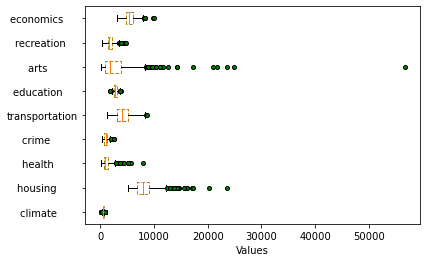

In [2]:
#利用箱型圖查看資型態
ratings = np.array(df)
categories = df.columns
fig, ax = plt.subplots()
boxprops = dict(linestyle = "--", linewidth = 1, \
color = "darkgoldenrod")
flierprops = dict(marker="o", markerfacecolor = "green",
markersize = 4, linestyle = "none")
ax.boxplot(ratings, boxprops = boxprops, \
flierprops = flierprops, \
labels = categories, vert = False)
ax.set_xlabel("Values")
plt.show()

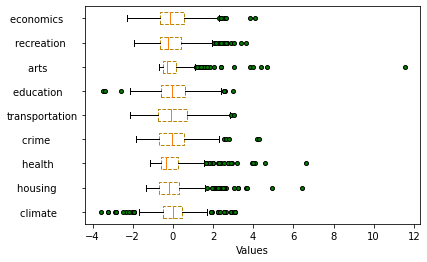

In [3]:
#資料品質不好--->做標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(ratings)
# Apply transform to dataset.
ratings_ = scaler.transform(ratings)

fig, ax = plt.subplots()
ax.boxplot(ratings_, boxprops = boxprops, \
flierprops = flierprops, \
labels = categories, vert = False)
ax.set_xlabel("Values")
plt.show()

<AxesSubplot:>

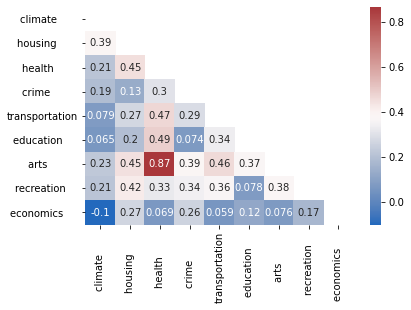

In [4]:
#看變數之間的相關性高低
import seaborn
import pandas as pd
df = pd.DataFrame(ratings_, columns = categories)
R = df.corr()
mask = np.triu(np.ones_like(R, dtype=bool)) # diagonal mask
seaborn.heatmap(R, annot=True, mask = mask, cmap='vlag') #熱力圖

In [5]:
# ratings_ is a 329 by 9 data matrix
Sx = np.cov(ratings_.T, bias=False) #.T轉置

N = ratings_.shape[0]
mu_x = ratings_.mean(axis = 0)
Tmp = ratings_ - np.tile(mu_x, (N, 1))
Sx_formula = Tmp.T @ Tmp / (N - 1)

print(Sx_formula)

[[ 1.00304878  0.38746841  0.21395285  0.19297385  0.07936115  0.06471647
   0.22766619  0.21415997 -0.10038787]
 [ 0.38746841  1.00304878  0.45439081  0.13463087  0.27275053  0.19853732
   0.44993535  0.42357584  0.27025421]
 [ 0.21395285  0.45439081  1.00304878  0.30558826  0.47175096  0.49172865
   0.86843566  0.32638902  0.06948193]
 [ 0.19297385  0.13463087  0.30558826  1.00304878  0.28745214  0.07464314
   0.39067005  0.34567724  0.26078738]
 [ 0.07936115  0.27275053  0.47175096  0.28745214  1.00304878  0.33701686
   0.46622266  0.36582818  0.05942738]
 [ 0.06471647  0.19853732  0.49172865  0.07464314  0.33701686  1.00304878
   0.37441703  0.0780444   0.12006529]
 [ 0.22766619  0.44993535  0.86843566  0.39067005  0.46622266  0.37441703
   1.00304878  0.3798139   0.07590401]
 [ 0.21415997  0.42357584  0.32638902  0.34567724  0.36582818  0.0780444
   0.3798139   1.00304878  0.17405956]
 [-0.10038787  0.27025421  0.06948193  0.26078738  0.05942738  0.12006529
   0.07590401  0.174059

<h3> W01_HW_其他計算cov的方法 </h3>

In [6]:
def cov_value(x,y):
    
    mean_x = sum(x) / float(len(x))
    mean_y = sum(y) / float(len(y))
    
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    
    sum_value = sum([sub_y[i]*sub_x[i] for i in range(len(x))])
    denom = float(len(x)-1)
    
    cov = sum_value/denom
    return cov

def covariance(arr):
    c = [[cov_value(a,b) for a in arr] for b in arr]
    return c

covariance(ratings_.T)

[[1.003048780487805,
  0.38746841290802253,
  0.21395285163114816,
  0.1929738542537066,
  0.07936115192783322,
  0.06471646890694856,
  0.22766619374952912,
  0.21415996990724054,
  -0.10038787104702254],
 [0.38746841290802253,
  1.0030487804878048,
  0.45439080510871593,
  0.13463087471907095,
  0.27275053078940004,
  0.19853731537310382,
  0.44993534999197443,
  0.4235758420070275,
  0.27025421367546115],
 [0.21395285163114816,
  0.45439080510871593,
  1.003048780487805,
  0.3055882648119182,
  0.47175096028111785,
  0.4917286451662377,
  0.8684356640538674,
  0.3263890170691783,
  0.06948192808276525],
 [0.1929738542537066,
  0.13463087471907095,
  0.3055882648119182,
  1.0030487804878048,
  0.2874521447621489,
  0.07464314479537247,
  0.39067005477750893,
  0.3456772351222687,
  0.2607873768297881],
 [0.07936115192783322,
  0.27275053078940004,
  0.47175096028111785,
  0.2874521447621489,
  1.0030487804878048,
  0.33701686325255237,
  0.46622265586416367,
  0.3658281842531065,
  0

In [7]:
from numpy.linalg import eig 
w, v = eig(Sx_formula) #計算特徵向量
idx = np.argsort(w)[::-1] #數組值從大到小的索引值
eigvals = w[idx]
eigvecs = v[:, idx]
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T #diag找對角線元素

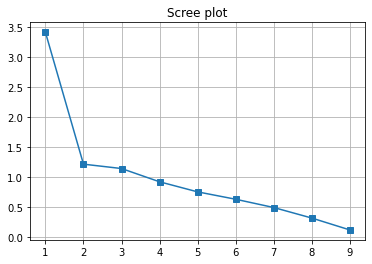

In [8]:
plt.figure()
x = np.arange(1, 1+len(eigvals))
plt.plot(x, eigvals, marker="s")
plt.title("Scree plot")
plt.grid(True)
plt.show()


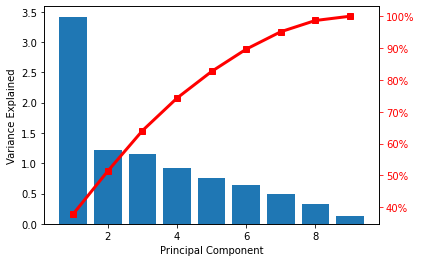

In [9]:
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots()
x = np.arange(1, 1+len(eigvals))
ax.bar(x, eigvals)
ax.set_xlabel("Principal Component")
ax.set_ylabel("Variance Explained")

ax2 = ax.twinx() #在圖片中共用x軸,不共用y軸
ax2.plot(x, eigvals.cumsum()/eigvals.sum()*100, \
    marker="s", color="red", lw=3)
ax2.tick_params(axis="y", colors="red")
ax2.yaxis.set_major_formatter(PercentFormatter())

plt.show()


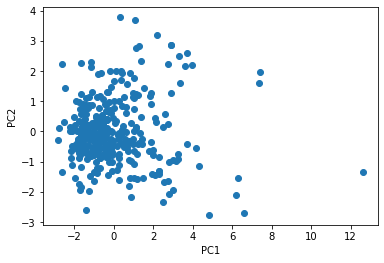

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(n_components=2)
new_X = pca.fit_transform(X)

plt.scatter(new_X[:, 0], new_X[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()